### Contexto:
El seguro de vida o seguro sobre la vida es un seguro que cubre el riesgo de muerte o incapacidad. Este seguro es formalizado mediante un contrato o póliza entre la empresa aseguradora y el asegurado.La empresa aseguradora garantizará una indemnización en caso de fallecimiento o invalidez del asegurado. El cálculo del costo del seguro se verá afectado por la edad del asegurado y el capital a asegurar.Al mismo tiempo, existen otras variables que afectarán el costo del seguro o inclusive que puedenllevar a ser negado por parte de la empresa aseguradora, entre ellas, la práctica de deportes de algo riesgo, una profesión riesgosa o enfermedades prexistentes. Dentro de las enfermedades prexistentes, las afecciones cardíacas son las que tienen mayor peso en la decisión por parte de la empresa aseguradora. 

### Descripción del problema
Una empresa aseguradora ha detectado que en los últimos años ha negado una gran cantidad de seguros de vida asociados a hipotecas. Todos estos casos se han debido a que,en el cuestionario de alta del seguro, el asegurado respondió que ha sufrido de alguna afección cardíaca. Sin embargo, un análisis posterior, permitió detectar que este criterio ha sido mal aplicado, en la mayoríade los casos se podría haber entregado el seguro. 

Estas malas decisiones han hecho perder clientes, y,por consiguiente, ingresos. La empresa ha tomado la decisión de solicitar análisis clínicos a aquellos potenciales asegurados que en el cuestionario de alta se desprenda riesgo de afección cardíaca. El objetivo es utilizar los resultados clínicos para inferir si el cliente tieneun alto riesgo de muerte, solo en este caso se negará la póliza.

Actualmente, los datos que son solicitados al potencial asegurado son los siguientes:

•Nombres y apellidos

•Fecha de nacimiento - AGE

•Peso y estatura

•Deportes que practica

•¿Actualmente fuma o ha fumado? - SMOKING

•¿Realiza alguna actividad de riesgo?

•¿Fue informado alguna vez que presentaba cifras elevadas de tensión arterial o le fue prescripto algún tratamiento para la hipertensión arterial? - HIGH BLOOD PRESSURE

•¿Padece o padeció enfermedades cardiovasculares(infarto, angina de pecho, arritmia, cardiopatía, etc.)?

•¿Recibe actualmente o recibió alguna vez tratamiento a causa de diabetes, colesterol, triglicéridos, hormonales, gota, cáncer o tumores? - DIABETES

La empresa aseguradora se encuentra en un fuerte proceso de transformación digital, por lo que pretende utilizar técnicas de aprendizaje automático para la toma dedecisión del otorgamiento de la póliza. Para esto, ha logrado obtener un dataset con valiosos datos, a partir de la investigación de Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone.BMC Med Inform Decis Mak20,16 (2020). https://doi.org/10.1186/s12911-020-1023-5

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clinical_records_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(clinical_records_df, test_size=0.2, random_state=0)

## Parte 1)
Efectúe un profundo EDA del dataset entregado. En caso de que existan dudas de la semántica de alguno de los features del dataset, se recomienda fuertemente investigar sobre el mismo y documentar el resultado.

#### Age
#### Decrease of red blood cells or hemoglobin (boolean)
#### Level of the CPK enzyme in the blood (mcg/L)
#### If the patient has diabetes (boolean)
#### Percentage of blood leaving the heart at each contraction (percentage)
#### If the patient has hypertension (boolean)
#### Platelets in the blood (kiloplatelets/mL)
#### Level of serum creatinine in the blood (mg/dL)
#### Level of serum sodium in the blood (mEq/L)
#### Woman or man (binary)
#### If the patient smokes or not (boolean)
#### Follow-up period (days)
#### If the patient deceased during the follow-up period (boolean)

In [4]:
clinical_records_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
clinical_records_df.isnull().values.any()

False

In [6]:
clinical_records_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
clinical_records_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

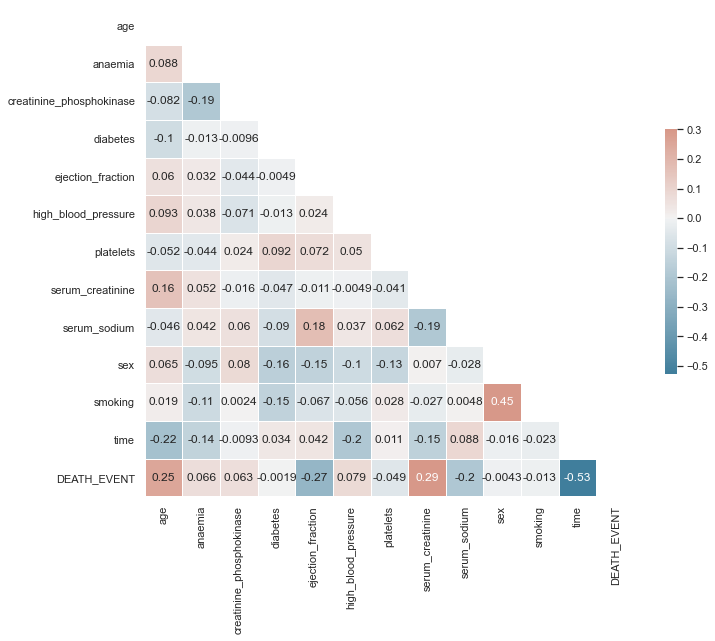

In [8]:
sns.set_theme(style="white")

corr = clinical_records_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

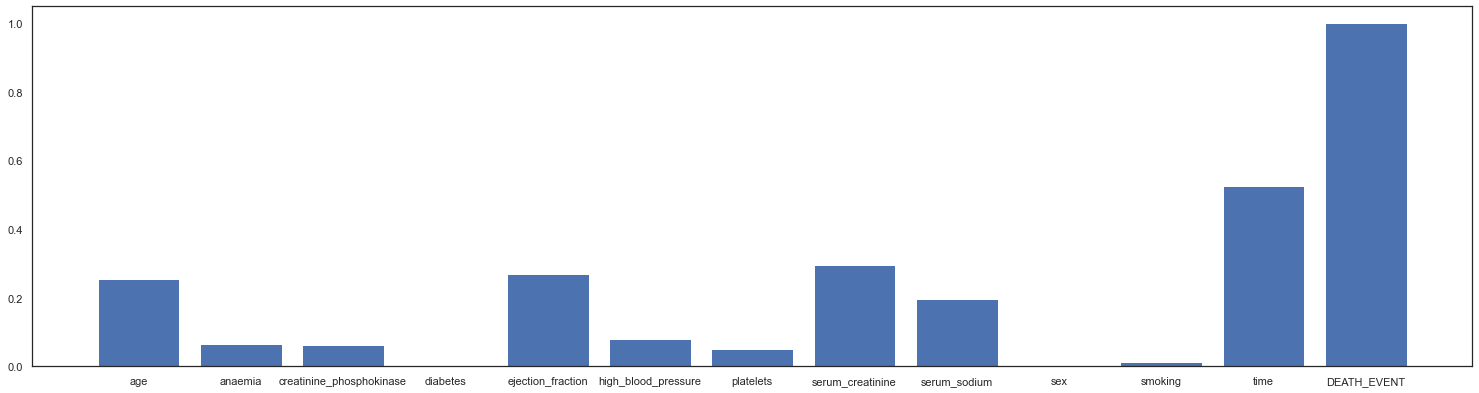

In [9]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
labels = clinical_records_df.columns
importance = np.absolute(corr['DEATH_EVENT'])
ax.bar(labels, importance)
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

X = train.drop('DEATH_EVENT', axis=1)
X_test = test.drop('DEATH_EVENT', axis=1)

clf = LogisticRegression(random_state=0, max_iter=500).fit(X, train.DEATH_EVENT)

print(f"Score in train: {clf.score(X, train.DEATH_EVENT)}")

print(f"Score in test: {clf.score(X_test, test.DEATH_EVENT)}")

print(f"coeficient {clf.coef_}")

Score in train: 0.8577405857740585
Score in test: 0.7333333333333333
coeficient [[ 5.38452196e-02  3.40969422e-04  2.20802889e-04  9.69420078e-04
  -7.95037413e-02 -4.44422755e-04 -4.42831139e-07  5.32227151e-03
   7.41413573e-03 -5.24108061e-04 -2.95917633e-04 -2.13617101e-02]]


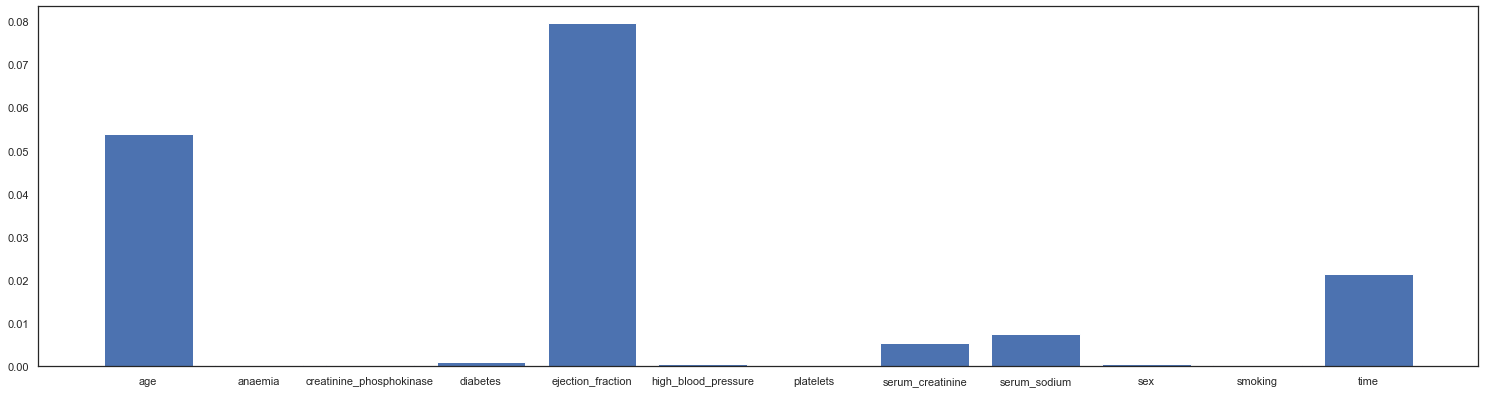

In [11]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
labels = X_test.columns
importance = np.absolute(clf.coef_[0])
ax.bar(labels, importance)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X = train.drop('DEATH_EVENT', axis=1)
X_test = test.drop('DEATH_EVENT', axis=1)

clf_rf = RandomForestClassifier(max_depth=4, random_state=0)
clf_rf.fit(X, train.DEATH_EVENT)

print(f"Score in train: {clf_rf.score(X, train.DEATH_EVENT)}")

print(f"Score in test: {clf_rf.score(X_test, test.DEATH_EVENT)}")

Score in train: 0.9330543933054394
Score in test: 0.8166666666666667


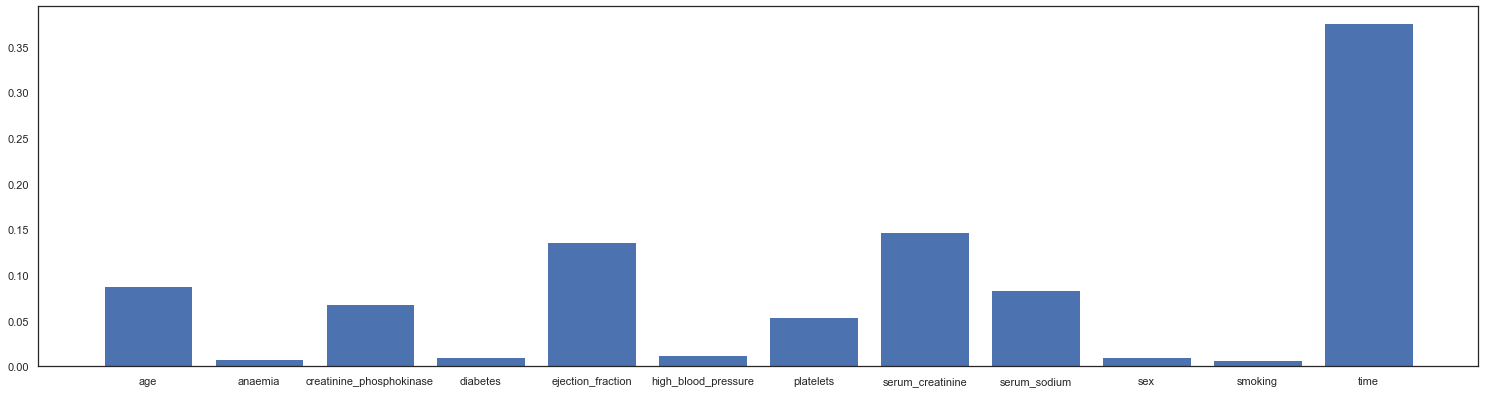

In [13]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
labels = X_test.columns

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py
importance = clf_rf.feature_importances_
ax.bar(labels, importance)
plt.show()

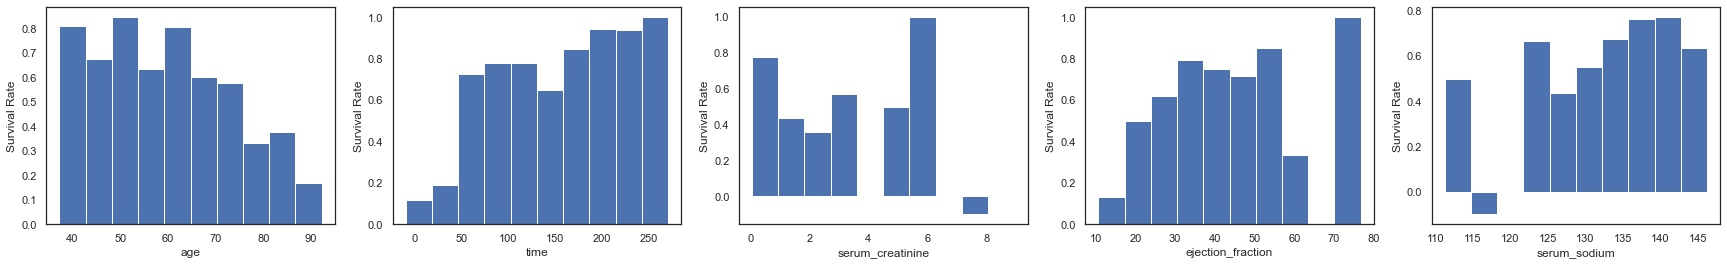

In [14]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(30, 4))

df_survived = clinical_records_df[clinical_records_df['DEATH_EVENT']==0]
df_not_survived = clinical_records_df[clinical_records_df['DEATH_EVENT']==1]

list_of_features = ['age', 'time', 'serum_creatinine', 'ejection_fraction', 'serum_sodium']

i=0
for feature_name in list_of_features:
    min = clinical_records_df[feature_name].min()
    max = clinical_records_df[feature_name].max()

    bins = np.linspace(min, max, 11)
    survived_hist=np.histogram(df_survived[feature_name], bins=bins,range=(min,max))
    not_survived_hist=np.histogram(df_not_survived[feature_name], bins=bins, range=(min,max))
    
    surv_rates = []
    for index in range(len(survived_hist[0])):
        divisor = (survived_hist[0][index]+not_survived_hist[0][index])
        if divisor == 0:
            surv_rates.append(-0.1)
        else:
            surv_rates.append(survived_hist[0][index]/divisor)

    # surv_rates = survived_hist[0]/(survived_hist[0]+not_survived_hist[0])
    axes[i].bar(bins[:-1], surv_rates, width = bins[1]-bins[0])
    axes[i].set_xlabel(feature_name)
    axes[i].set_ylabel('Survival Rate')
    i+=1


Las features que tienen una correlación con el evento de muerte mayor a 0.2 son:
* time
* serum_creatinine
* ejection_fraction
* age
* serum_sodium

por otro lado, las que tienen los coeficientes más altos en la regresión logistica son:
* ejection_fraction
* age
* time
* serum_creatinine

y finalmente, las features que más aportan al random forest (que disminuyen más la entropía) son:
* time
* serum_creatinine
* ejection_fraction
* age
* serum_sodium
* creatine_phosphokinase


In [15]:
# Hecho para probar como se comporta, muy mal debido a los pocos datos

from sklearn.neural_network import MLPClassifier

X = train.drop('DEATH_EVENT', axis=1)
X_test = test.drop('DEATH_EVENT', axis=1)

clf_mlp = MLPClassifier(random_state=1, max_iter=3000)
clf_mlp.fit(X, train.DEATH_EVENT)

print(f"Score in train: {clf_mlp.score(X, train.DEATH_EVENT)}")

print(f"Score in test: {clf_mlp.score(X_test, test.DEATH_EVENT)}")

Score in train: 0.3138075313807531
Score in test: 0.4


## Parte 2)
Utilizando las técnicas vistas en el curso,detecte las características de las poblaciones con mayor riesgo de muerte producto de un accidente cardiovascular.

Paso a detallar el camino de decisión de un árbol para mostrar las características de las poblaciones con mayor riesgo de muerte:

Score in train: 0.8744769874476988
Score in test: 0.8333333333333334


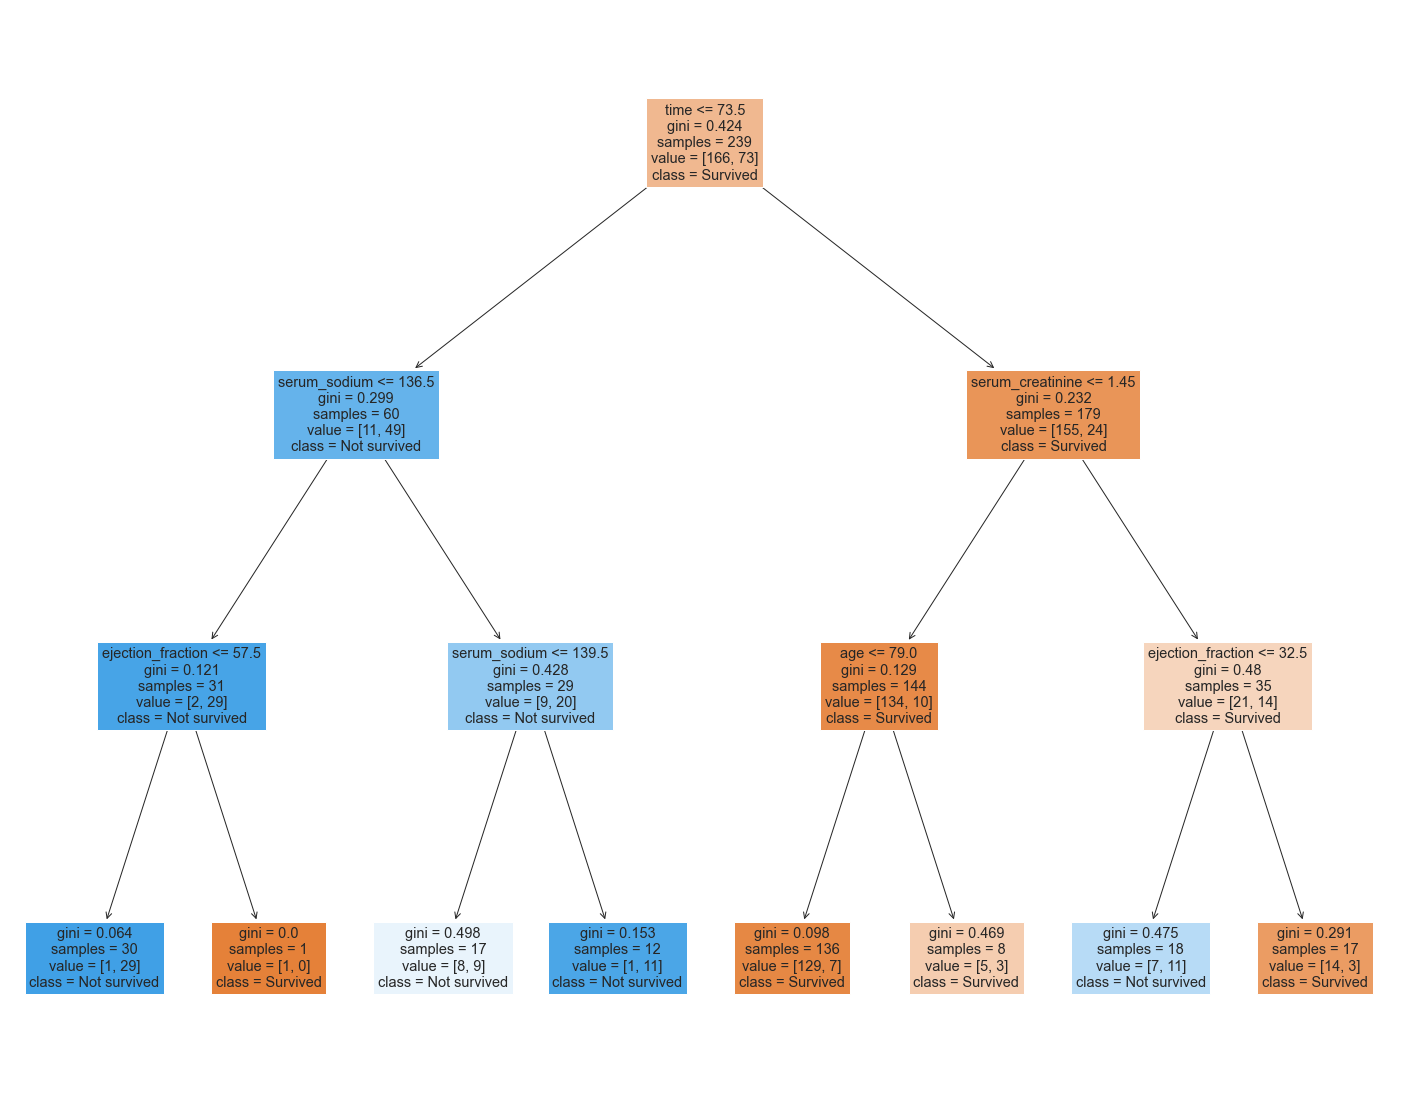

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf_dt = DecisionTreeClassifier(random_state=0, max_depth=3) 

clf_dt.fit(X, train.DEATH_EVENT)

print(f"Score in train: {clf_dt.score(X, train.DEATH_EVENT)}")

print(f"Score in test: {clf_dt.score(X_test, test.DEATH_EVENT)}")

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt, 
                   feature_names = X.columns.array,
                    class_names = ['Survived', 'Not survived'],
                   filled=True)

## Parte 3)
Para las poblaciones de mayor riesgo, en función de las respuestas obtenidas en el formulario de alta, determine el conjunto de resultados clínicos que el potencial asegurado debe entregar para avanzar en el proceso de obtención de la póliza.


En base a los resultados anteriores, preguntar el intervalo de tiempo entre consulta al cardiólogo y follow up es un buen estimador, y en cuanto a los estudios, los que debemos preguntar en orden de importancia son (obtenidos del Random Forest, tomando en cuenta que la age ya la tenemos del formulario anterior):

* serum_creatinine
* ejection_fraction
* serum_sodium
* creatine_phosphokinase

## Parte 4)
Para el conjunto de respuestas obtenidas en el formulario de alta, diseñe un modelo predictivo que determine si el potencial asegurado requiere de la realización de análisis clínicos adicionales o la póliza le será entregada sin averiguaciones adicionales.Documente detalladamente todas las decisiones tomadas.Actualmente no existen formularios digitalizados con las respuestas de los asegurados, por lo que es necesario la generación de datos sintéticos que representen las distintas poblaciones. Esto datos serán los utilizados para el entrenamiento y test del modelo predictivo.

•Nombres y apellidos

•Fecha de nacimiento - AGE

•Peso y estatura

•Deportes que practica

•¿Actualmente fuma o ha fumado? - SMOKING

•¿Realiza alguna actividad de riesgo?

•¿Fue informado alguna vez que presentaba cifras elevadas de tensión arterial o le fue prescripto algún tratamiento para la hipertensión arterial? - HIGH BLOOD PRESSURE

•¿Padece o padeció enfermedades cardiovasculares (infarto, angina de pecho, arritmia, cardiopatía, etc.)? - Los que corresponden al dataset que tenemos

•¿Recibe actualmente o recibió alguna vez tratamiento a causa de diabetes, colesterol, triglicéridos, hormonales, gota, cáncer o tumores? - DIABETES

#### Para obtener aquellos usuarios de los que necesitamos más estudios, dividiremos el dataset en clústers y veremos cuales grupos presentan más muertes, para poder discriminar y pedir análisis para estos.

In [17]:
features = ['age', 'height', 'weight',  'sports', 'smoking', 'risk_activity', 'high_blood_pressure', 'cardiovascular_diseases', 'treatment_of_diseases', 'DEATH_EVENT']

number_of_samples = 60000

rng = np.random.default_rng()

age = rng.integers(18, 100, size=(number_of_samples))
height = rng.integers(150, 200, size=(number_of_samples))/100
# bmi = kg/m2
# bmi*m2 = kg
weight = (16.0 + 12 * rng.random(size=(number_of_samples)))*(height ** 2)
sports = rng.integers(0, 30, size=(number_of_samples))
smoking = np.asarray([1 if number>0.8  else 0 for number in rng.random(size=(number_of_samples, 1))])
risk_activity = np.asarray([1 if number>0.8  else 0 for number in rng.random(size=(number_of_samples, 1))])
high_blood_pressure = np.asarray([1 if number>0.8  else 0 for number in rng.random(size=(number_of_samples, 1))])
cardiovascular_diseases = np.asarray([1 if number>0.8 else 0 for number in rng.random(size=(number_of_samples, 1))])
treatment_of_diseases = np.asarray([1 if number>0.8 else 0 for number in rng.random(size=(number_of_samples, 1))])
DEATH_EVENT = np.asarray([1 if number>0.8 else 0 for number in rng.random(size=(number_of_samples, 1))])

feature_set_and_label = (age, height, weight, sports, smoking, risk_activity, high_blood_pressure, cardiovascular_diseases, treatment_of_diseases, DEATH_EVENT)

X1_data = np.transpose(np.vstack(feature_set_and_label))

X1 = pd.DataFrame(X1_data, columns=features)

In [18]:
X1.head()

,age,height,weight,sports,smoking,risk_activity,high_blood_pressure,cardiovascular_diseases,treatment_of_diseases,DEATH_EVENT
0,32.0,1.93,100.579443,22.0,1.0,1.0,0.0,0.0,0.0,0.0
1,74.0,1.85,64.367522,22.0,0.0,1.0,0.0,0.0,0.0,0.0
2,95.0,1.82,79.696744,16.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56.0,1.65,47.068302,27.0,0.0,1.0,1.0,1.0,1.0,0.0
4,60.0,1.86,88.468647,10.0,0.0,1.0,0.0,0.0,0.0,0.0


Hacemos clusterización con DBScan (porque a diferencia de kmeans, no necesita especificar un número de clústers, lo que permite crealos por afinidad y sería soportado con los datos reales)

In [19]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

X1_all = X1.drop('DEATH_EVENT', axis=1)

scaler = MinMaxScaler()
imputer = KNNImputer(n_neighbors=2)
clustering = DBSCAN(eps=0.3)

pipeline_dbscan = Pipeline([
    ('scaler', scaler),
    ('knn_imputer', imputer),
    ('clustering', clustering),
])

dbscan_fitted = pipeline_dbscan.fit_predict(X1_all)

In [20]:
#agregamos una columna con el número e cluster al dataframe

cluster_column = pd.Series(data = dbscan_fitted, name= 'cluster', dtype=int)

cluster_column.head()

X1_all['cluster'] = cluster_column

X1_all['DEATH_EVENT'] = X1.DEATH_EVENT

### Tomamos aquellos clusters cuyas poblaciones (y los outliers, la idea es ver como se comportan con mayor información) tienen mean mayor a 0.15 de DEATH_EVENTS (un threshold elegido, con datos reales se puede ajustar). La idea es no rechazar a nadie de primera sin estudios adicionales, pero sino se puede poner un threshold mayor de rechazo directamente.

En datos no sintéticos se va a comportar mejor, el label está puesto de forma totalmente randómica, no está relacionado a los datos, entonces los blobs no van a estar asociados a un resultado necesariamente

In [21]:
threshold = 0.15
means = X1_all.groupby(['cluster']).agg(['mean'])['DEATH_EVENT']['mean']

# incluimos a los outliers
dangerous_clusters = list(filter(lambda index: index != None, [index if (means[index] > threshold or index == -1) else None for index in range(len(means) - 1)]))

X1_to_ask_for_more = X1_all[X1_all['cluster'].isin(dangerous_clusters)]
X1_to_ask_for_more.head()

,age,height,weight,sports,smoking,risk_activity,high_blood_pressure,cardiovascular_diseases,treatment_of_diseases,cluster,DEATH_EVENT
0,32.0,1.93,100.579443,22.0,1.0,1.0,0.0,0.0,0.0,0,0.0
1,74.0,1.85,64.367522,22.0,0.0,1.0,0.0,0.0,0.0,1,0.0
2,95.0,1.82,79.696744,16.0,0.0,0.0,0.0,1.0,0.0,2,0.0
3,56.0,1.65,47.068302,27.0,0.0,1.0,1.0,1.0,1.0,33,0.0
4,60.0,1.86,88.468647,10.0,0.0,1.0,0.0,0.0,0.0,1,0.0


In [22]:
print(means)

cluster
-1     0.243902
 0     0.218671
 1     0.202508
 2     0.204550
 3     0.190784
 4     0.196352
 5     0.199503
 6     0.193809
 7     0.208266
 8     0.193713
 9     0.178082
 10    0.185185
 11    0.191935
 12    0.206702
 13    0.209729
 14    0.214568
 15    0.200608
 16    0.216912
 17    0.211129
 18    0.214545
 19    0.229508
 20    0.201365
 21    0.212046
 22    0.192182
 23    0.245033
 24    0.222973
 25    0.138889
 26    0.198738
 27    0.375000
 28    0.236486
 29    0.200000
 30    0.187500
 31    0.222222
 32    0.200000
 33    0.181818
 34    0.000000
 35    0.166667
 36    0.250000
 37    0.250000
 38    0.200000
 39    0.125000
 40    0.083333
Name: mean, dtype: float64


## Parte 5)
Para aquellos potenciales asegurados que hayan requerido de análisis clínicos, desarrolle un modelo predictivo que determine si la póliza será otorgada o rechazada. Documente detalladamente todas las decisiones tomadas.

In [23]:
# Para ver que tan desbalanceados están los datos
print(X1_to_ask_for_more.groupby('DEATH_EVENT').size())

# en caso de unbalanced labels:
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=0)

# X_resampled, y_resampled = smote_enn.fit_resample(X1_to_ask_for_more.drop('DEATH_EVENT', axis=1), X1_to_ask_for_more.DEATH_EVENT)
# X1_to_ask_for_more = pd.concat([X_resampled, y_resampled], axis=1)

# print(X1_to_ask_for_more.groupby('DEATH_EVENT').size())

# Separamos en training, test y validation
train_generated, test_validate_generated = train_test_split(X1_to_ask_for_more, test_size=0.4, random_state=0)
test_generated, validate_generated = train_test_split(test_validate_generated, test_size=0.5, random_state=0)

DEATH_EVENT
0.0    47829
1.0    11985
dtype: int64


In [24]:
X1_train = train_generated.drop(['DEATH_EVENT', 'cluster'], axis=1)
print(X1_train.shape)

X1_test = test_generated.drop(['DEATH_EVENT', 'cluster'], axis=1)
print(X1_test.shape)

X1_validate = validate_generated.drop(['DEATH_EVENT', 'cluster'], axis=1)
print(X1_validate.shape)

(35888, 9)
(11963, 9)
(11963, 9)


### Creamos 3 modelos, Random Forest, Support Vector Machine y Multilayer Perceptron, con un feature engineering apropiado y pipelines

In [25]:
from sklearn.decomposition import PCA

clf_rf = RandomForestClassifier(max_depth=5, random_state=0)
pca = PCA(n_components=6)


# {'clf-rf__max_depth': 9}

pipeline = Pipeline([
    ('scaler', scaler),
    ('knn_imputer', imputer),
    ('pca', pca),
    ('clf-rf', clf_rf),
])
random_forest_fitted = pipeline.fit(X1_train, train_generated.DEATH_EVENT)

print(f"Score in train: {random_forest_fitted.score(X1_train, train_generated.DEATH_EVENT)}")

print(f"Score in test: {random_forest_fitted.score(X1_test, test_generated.DEATH_EVENT)}")

Score in train: 0.7999888542131074
Score in test: 0.8015547939480063


In [26]:
from sklearn.linear_model import SGDClassifier

# {'clf-svm__penalty': 'l2', 'clf-svm__loss': 'hinge', 'clf-svm__fit_intercept': True}

pipeline = Pipeline([
    ('scaler', scaler),
    ('knn_imputer', imputer),
    ('pca', pca),
    ('clf-svm', SGDClassifier(alpha=1e-3, random_state=42, penalty = 'l2', loss = 'hinge', fit_intercept= True)),
])

svm_fitted = pipeline.fit(X1_train, train_generated.DEATH_EVENT)

print(f"Score in train: {svm_fitted.score(X1_train, train_generated.DEATH_EVENT)}")

print(f"Score in test: {svm_fitted.score(X1_test, test_generated.DEATH_EVENT)}")

Score in train: 0.7998773963441819
Score in test: 0.8016383850204798


In [27]:
from sklearn.neural_network import MLPClassifier

# {'clf-mlp__activation': 'identity', 'clf-mlp__alpha': 0.01}

clf_mlp = MLPClassifier(random_state=1, activation="identity", alpha=0.01, max_iter=3000)

pipeline = Pipeline([
    ('scaler', scaler),
    ('knn_imputer', imputer),
    ('pca', pca),
    ('clf-mlp', clf_mlp),
])
mlp_fitted = pipeline.fit(X1_train, train_generated.DEATH_EVENT)

print(f"Score in train: {mlp_fitted.score(X1_train, train_generated.DEATH_EVENT)}")

print(f"Score in test: {mlp_fitted.score(X1_test, test_generated.DEATH_EVENT)}")

Score in train: 0.7998773963441819
Score in test: 0.8016383850204798


## Calculamos los mejores hiperparámetros con GridSearch y RandomSearch (en el caso de svm hay demasiados hiperparámetros ajustables)

In [28]:
# from sklearn.model_selection import GridSearchCV

# parameters_rf = {
#     'clf-rf__max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
# }

# gs_clf = GridSearchCV(random_forest_fitted, parameters_rf, n_jobs=-1)
# gs_clf_fitted = gs_clf.fit(X1_test, test_generated.DEATH_EVENT)

# print(gs_clf_fitted.best_params_)
# print(gs_clf_fitted.best_score_)

In [29]:
# parameters_svm = {
#     'clf-svm__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
#     'clf-svm__penalty': ['l2', 'l1', 'elasticnet'],
#     'clf-svm__fit_intercept': (True, False),
# }

# from sklearn.model_selection import RandomizedSearchCV

# gs_clf = RandomizedSearchCV(svm_fitted, parameters_svm, n_jobs=-1, n_iter=300)
# gs_clf_fitted = gs_clf.fit(X1_test, test_generated.DEATH_EVENT)

# print(gs_clf_fitted.best_params_)
# print(gs_clf_fitted.best_score_)

In [30]:
# parameters_mlp = {
#     'clf-mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'clf-mlp__alpha': (1e-2, 1e-3),
# }

# gs_clf = GridSearchCV(mlp_fitted, parameters_mlp, n_jobs=-1)
# gs_clf_fitted = gs_clf.fit(X1_test, test_generated.DEATH_EVENT)

# print(gs_clf_fitted.best_params_)
# print(gs_clf_fitted.best_score_)

In [31]:
print("Score en test de validación del RF")

print(f"Score in test: {random_forest_fitted.score(X1_validate, validate_generated.DEATH_EVENT)}")

Score en test de validación del RF
Score in test: 0.7968736938894926


In [32]:
print("Score en test de validación del SVM")

print(f"Score in test: {svm_fitted.score(X1_validate, validate_generated.DEATH_EVENT)}")

Score en test de validación del SVM
Score in test: 0.7968736938894926


In [33]:
print("Score en test de validación del MLP")

print(f"Score in test: {mlp_fitted.score(X1_validate, validate_generated.DEATH_EVENT)}")

Score en test de validación del MLP
Score in test: 0.7968736938894926


## Parte 6)
Ensaye una discusión general del trabajo realizado, haciendo los comentarios y recomendaciones que considere necesarias.

### Fue un proyecto muy interesante, debido al tema tiempos no lo pudimos entregar en fecha, pero esto no hizo que no sacaramos buenas conclusiones.

### Hubo varias dudas, sobretodo con la generación de datos sintéticos, y que variables podían ser usadas en la parte 4, en donde usamos como label DEATH_EVENT, pero quizás no correspondía. 

### Creemos que con datos reales los resultados van a ser mucho más interesantes, porque debido a la distribución randómica actual, los algoritmos no demuestran sus fortalezas. En el caso de datos reales la idea es utilizar Grid Search y Random Search nuevamente para tunear los hiperparámetros en el set de testeo (paradigma train, test, validate), por otro lado, también dejamos comentado código para manejar labels muy desbalanceadas (usa una combinación de over y under sample).

### Por otro lado, en el ejercicio 2, si bien usamos un DecisionTreeClassifier para mostrar como son los datos de un individuo con un DEATH_EVENT, se puede apreciar tambien usando los conceptos del PDA, por ejemplo se saben las correlaciones, las variables más importantes y además está el histograma del survival rate.
